## 1. Random Walks
* https://ko.wikipedia.org/wiki/%EB%AC%B4%EC%9E%91%EC%9C%84_%ED%96%89%EB%B3%B4

(a) 1차원 랜덤워크 모형을 시뮬레이션으로 구현하여라. 구체적으로 1차원 격자에서 왼쪽으로 움직일 확률이 1/2, 오른쪽으로 움직일 확률이 1/2로 가정하자. 그리고 $t$시간이 지난 후에 입자가 존재하는 위치를 구하는 코드를 작성하여라. 초기에 입자는 원점에 존재하며 매 타임스텝마다 1번씩 움직인다. (몬테카를로 시뮬레이션)

In [1]:
import random
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

step: [  0.  -1.   0.  -1.  -2.  -1.   0.   1.   2.   1.   0.  -1.   0.   1.
   0.  -1.  -2.  -3.  -2.  -1.  -2.  -1.   0.  -1.  -2.  -3.  -4.  -5.
  -6.  -5.  -6.  -7.  -6.  -5.  -6.  -5.  -6.  -5.  -6.  -7.  -8.  -7.
  -6.  -5.  -6.  -7.  -8.  -9.  -8.  -7.  -6.  -7.  -6.  -5.  -6.  -7.
  -6.  -7.  -6.  -7.  -8.  -9.  -8.  -9.  -8.  -9.  -8.  -9. -10.  -9.
 -10.  -9.  -8.  -9. -10. -11. -12. -13. -12. -11. -10.  -9.  -8.  -9.
 -10. -11. -12. -11. -10.  -9.  -8.  -9.  -8.  -7.  -8.  -9.  -8.  -7.
  -6.  -7.  -6.]
position: -6.0


[-6.0]

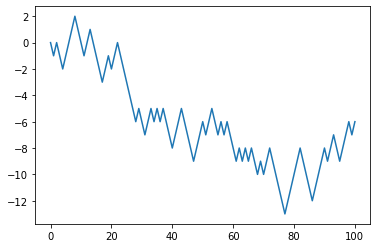

In [2]:
N = 1
T = 100
x = np.zeros((N, T+1))
z=[]
for t in range(1,T+1):
    for i in range(N):
        j=random.random()
        if j>0.5:
            x[i][t]=x[i][t-1]+1
        elif j<0.5:
            x[i][t]=x[i][t-1]-1
for i in range(N):
    print("step:",x[i])
    print("position:",x[i][-1])
    z.append(x[i][-1])
    plt.plot(x[i])
z

(b) 이러한 시행을 충분히 많이 시행하여서 $t$시간 후에 입자가 특정 위치에 존재하는 확률 분포를 구하여라. (파이썬 기초)

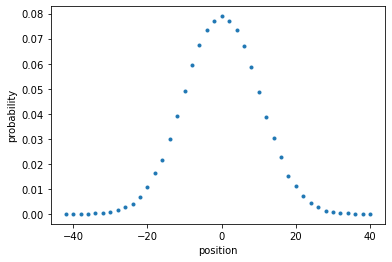

In [3]:
from collections import Counter
import pandas as pd

N = 100000
T = 100
x = np.zeros((N, T+1))
z=[]
for t in range(1,T+1):
    for i in range(N):
        j=random.random()
        if j>0.5:
            x[i][t]=x[i][t-1]+1
        elif j<0.5:
            x[i][t]=x[i][t-1]-1
for i in range(N):
    z.append(x[i][-1])
    
zc=Counter(z)
x=pd.Series(zc).values/N
y=pd.Series(zc).index
plt.ylabel("probability")
plt.xlabel("position")
plt.plot(y,x,'.')

In [4]:
# N번 시행했을 때 특정 위치에 존재할 경우의 수
Counter(z)

Counter({10.0: 4870,
         -4.0: 7340,
         4.0: 7336,
         -12.0: 3896,
         0.0: 7893,
         -6.0: 6730,
         14.0: 3024,
         -2.0: 7703,
         2.0: 7715,
         -8.0: 5932,
         18.0: 1517,
         12.0: 3866,
         -18.0: 1643,
         -10.0: 4893,
         16.0: 2265,
         6.0: 6702,
         -14.0: 2991,
         8.0: 5848,
         22.0: 730,
         -16.0: 2143,
         -20.0: 1083,
         26.0: 277,
         20.0: 1099,
         -22.0: 695,
         -26.0: 266,
         34.0: 31,
         24.0: 446,
         -24.0: 415,
         -30.0: 97,
         -28.0: 177,
         32.0: 50,
         36.0: 12,
         28.0: 133,
         30.0: 75,
         -32.0: 49,
         38.0: 7,
         -34.0: 25,
         -36.0: 14,
         -40.0: 2,
         -42.0: 3,
         40.0: 5,
         -38.0: 2})

In [5]:
# N번 시행했을 때 특정 위치에 존재할 확률
z.count(0)/N

0.07893

In [6]:
# N번 시행했을 때 x~y위치에 존재할 확률
def p(x,y):
    sum=0
    for i in range(x,y+1):
         
        sum=sum+z.count(i)/N
        i=i+1     
    return sum

In [7]:
p(-2,4)

0.30646999999999996

In [8]:
z.count(0)/N+z.count(1)/N+z.count(2)/N+z.count(3)/N+z.count(4)/N+z.count(-1)+z.count(-2)/N

0.30646999999999996

## 2. Bifurcation
다음으로 주어지는 미분방정식이 있다.$$ \frac{dx}{dt}= rx-x^2. $$

(a) 이 방정식을 다음의 조건에서 풀고 궤적을 그려라. (미분방정식)

1. r=-1, x(0)=2
* r=-1, x(0)=-2
* r=1, x(0)=2
* r=1, x(0)=-2

In [9]:
import numpy as np
import sympy
from sympy import Symbol
from sympy import *
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

In [10]:
r, t = sympy.symbols('r, t')
x = Function('x')
x, x(t).diff(t)

(x, Derivative(x(t), t))

In [11]:
Eq(x(t).diff(t),r*x(t)-x(t)**2)

Eq(Derivative(x(t), t), r*x(t) - x(t)**2)

In [12]:
sol = dsolve(Eq(x(t).diff(t),r*x(t)-x(t)**2))
sol

Eq(x(t), r*exp(r*(C1 + t))/(exp(r*(C1 + t)) - 1))

In [13]:
# r=-1, x(0)=2
r=-1
sol = dsolve(Eq(x(t).diff(t),r*x(t)-x(t)**2), ics= {x(0):2})
sol

Eq(x(t), -2/(3*(2/3 - exp(t))))

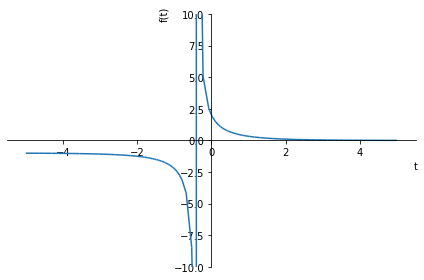

In [14]:
plot( sol.rhs, (t,-5,5),ylim=[-10,10])

In [15]:
# r=-1, x(0)=-2
r=-1
sol = dsolve(Eq(x(t).diff(t),r*x(t)-x(t)**2), ics= {x(0):-2})
sol

Eq(x(t), -2/(2 - exp(t)))

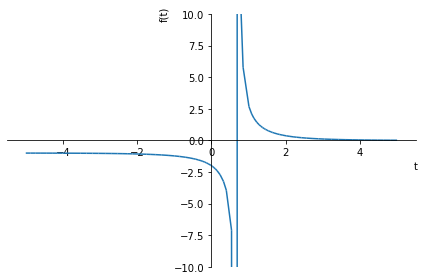

In [16]:
plot( sol.rhs, (t,-5,5),ylim=[-10,10])

In [17]:
# r=1, x(0)=2
r=1
sol = dsolve(Eq(x(t).diff(t),r*x(t)-x(t)**2), ics= {x(0):2})
sol

Eq(x(t), 1/(1 - exp(-t)/2))

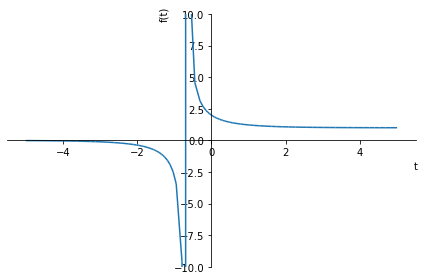

In [18]:
plot( sol.rhs, (t,-5,5),ylim=[-10,10])

In [19]:
# r=1, x(0)=-2
r=1
sol = dsolve(Eq(x(t).diff(t),r*x(t)-x(t)**2), ics= {x(0):-2})
sol

Eq(x(t), 1/(1 - 3*exp(-t)/2))

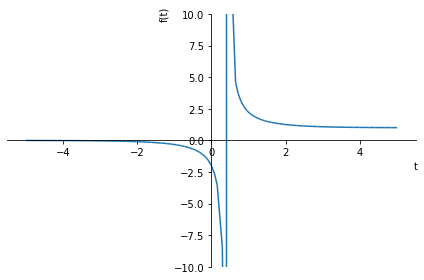

In [20]:
plot( sol.rhs, (t,-5,5),ylim=[-10,10])

(b) 정상상태(dx/dt=0)에서 가능한 해를 구하여라. (방정식)

즉, 다음의 조건에서 파이썬을 이용하여 방정식을 풀어라.$$ 0= rx -x^2 = x( r-x) $$

1. r=-1
*  r=1

In [21]:
r, x = sympy.symbols('r, x')

In [22]:
sympy.factor(r*x-x**2)

-x*(-r + x)

In [23]:
# r=-1
r=-1
sympy.solve(r*x-x**2)

[-1, 0]

In [24]:
# r=1
r=1
sympy.solve(r*x-x**2)

[0, 1]